In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Learn the following models on XOR dataset (refer to Tensorflow Playground and generate the dataset on your own containing 200 training instances and 200 test instances) such that all these models achieve similar results (good). The definition of good is left subjective – but you would expect the classifier to capture the shape of the XOR function

In [38]:
np.random.seed(1)
# training set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y': [0]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y': [1]*50})
print(dataset_0_1)
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y': [1]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y': [0]*50})
# dataset_1_1
train_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the train_data
# train_data = train_data.sample(frac = 1).reset_index(drop = True)
# train_data

          x1        x2  y
0   5.903165 -1.128848  1
1   2.605822 -0.750230  1
2   4.941859 -1.869520  1
3   4.672267 -2.583034  1
4   3.542134 -5.034171  1
5   5.733187 -3.198720  1
6   3.129412 -3.928968  1
7   5.266357 -4.649760  1
8   3.053472 -2.444929  1
9   2.501208 -4.126381  1
10  5.488328 -0.502167  1
11  3.929720 -0.542187  1
12  2.527999 -4.457290  1
13  3.929104 -5.334652  1
14  5.750233 -4.842224  1
15  3.320518 -3.002495  1
16  2.681027 -1.628486  1
17  3.425554 -4.750833  1
18  1.277026 -4.511799  1
19  3.067225 -0.889969  1
20  1.482990 -3.504908  1
21  5.312626 -2.299890  1
22  5.303618 -4.598003  1
23  1.963044 -5.388196  1
24  4.011616 -2.904858  1
25  5.173229 -3.137154  1
26  1.362457 -5.083970  1
27  4.261171 -2.269163  1
28  2.245939 -2.735939  1
29  2.370010 -2.075176  1
30  1.583470 -5.132727  1
31  2.881639 -1.490833  1
32  2.245288 -4.667705  1
33  4.255508 -2.883889  1
34  4.650361 -1.288224  1
35  1.520569 -5.866017  1
36  3.859544 -4.053825  1
37  1.175800

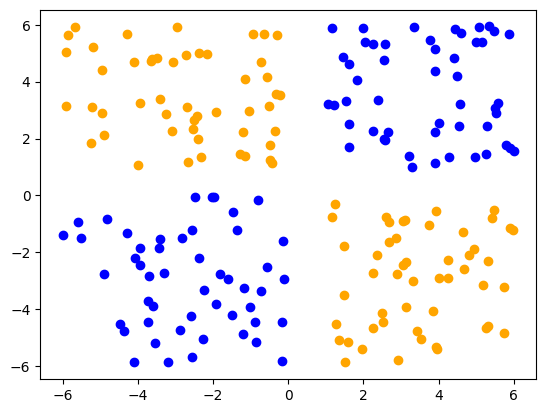

In [39]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_data['x1'][train_data['y'] == 0], train_data['x2'][train_data['y'] == 0], color = 'blue')
ax.scatter(train_data['x1'][train_data['y'] == 1], train_data['x2'][train_data['y'] == 1], color = 'orange')

In [40]:
np.random.seed(20)
# test set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y1': [1]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y1': [0]*50})
# dataset_0_1
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y1': [0]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y1': [1]*50})
# dataset_1_1
test_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the test_data
test_data = test_data.sample(frac= 1).reset_index(drop= True) 
test_data

,x1,x2,y1
0,2.677554,-0.116946,0
1,-0.740016,2.317857,0
2,-5.618369,1.146977,0
3,-3.585207,-3.556030,1
4,-0.500088,-5.729196,1
...,...,...,...
195,2.897847,-5.970784,0
196,2.459420,-5.740272,0
197,-0.321230,-4.103066,1
198,2.084982,2.387607,1


In [41]:
# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [42]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Define features and target variable
X_train = train_data[['x1', 'x2']].values.astype(np.float32)
y_train = train_data['y'].values.reshape(-1, 1).astype(np.float32)
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)

# Create DataLoader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Part A -> a MLP

In [43]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        # part 1
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out
    

Epoch 1/100, Train Loss: 0.8469, Test Loss: 0.6210
Epoch 2/100, Train Loss: 0.8167, Test Loss: 0.6333
Epoch 3/100, Train Loss: 0.7927, Test Loss: 0.6437
Epoch 4/100, Train Loss: 0.7720, Test Loss: 0.6533
Epoch 5/100, Train Loss: 0.7549, Test Loss: 0.6621
Epoch 6/100, Train Loss: 0.7400, Test Loss: 0.6707
Epoch 7/100, Train Loss: 0.7244, Test Loss: 0.6791
Epoch 8/100, Train Loss: 0.7120, Test Loss: 0.6886
Epoch 9/100, Train Loss: 0.6994, Test Loss: 0.6987
Epoch 10/100, Train Loss: 0.6878, Test Loss: 0.7084
Epoch 11/100, Train Loss: 0.6769, Test Loss: 0.7186
Epoch 12/100, Train Loss: 0.6669, Test Loss: 0.7304
Epoch 13/100, Train Loss: 0.6559, Test Loss: 0.7434
Epoch 14/100, Train Loss: 0.6453, Test Loss: 0.7567
Epoch 15/100, Train Loss: 0.6346, Test Loss: 0.7723
Epoch 16/100, Train Loss: 0.6233, Test Loss: 0.7882
Epoch 17/100, Train Loss: 0.6117, Test Loss: 0.8046
Epoch 18/100, Train Loss: 0.5978, Test Loss: 0.8277
Epoch 19/100, Train Loss: 0.5823, Test Loss: 0.8513
Epoch 20/100, Train L

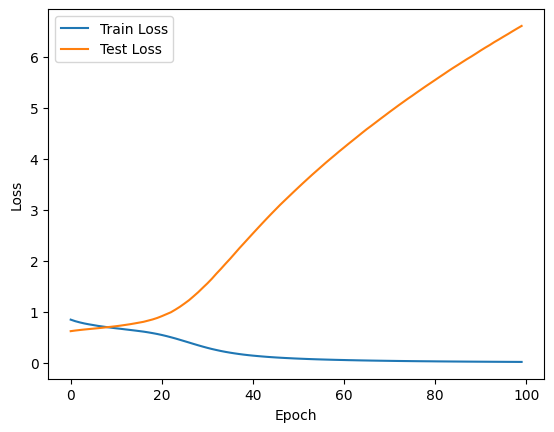

In [44]:
# Initialize the model, loss function, and optimizer
model = MLP(input_size=2, hidden_size=8)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
train_losses = []
test_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot training and test losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

part B -> MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

In [45]:
# Define the MLP model with L1 regularization
class MLP_L1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, l1_penalty):
        super(MLP_L1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        self.l1_penalty = l1_penalty

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out
    
    def l1_regularization_loss(self):
        l1_loss = 0
        for param in self.parameters():
            l1_loss += torch.norm(param, p=1)
        return self.l1_penalty * l1_loss
    

In [46]:
# Define the penalty coefficients
penalty_coefficients = [0.001, 0.01, 0.1, 1.0]

# Train the model with different penalty coefficients
best_val_accuracy = 0.0
best_model = None
best_penalty_coefficient = None


# Define lists training and test losses
train_losses = []
test_losses = []    

for penalty_coefficient in penalty_coefficients:
    model = MLP_L1(input_size=2, hidden_size=8, output_size=1, l1_penalty=penalty_coefficient)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(100):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss += model.l1_regularization_loss()
            loss.backward()
            optimizer.step()

        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                predicted = torch.round(outputs)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)
        
        val_accuracy = val_correct / val_total
        print(f'Penalty Coefficient: {penalty_coefficient}, Epoch {epoch+1}/100, Validation Accuracy: {val_accuracy:.4f}')

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_penalty_coefficient = penalty_coefficient

print(f'Best Penalty Coefficient: {best_penalty_coefficient}, Best Validation Accuracy: {best_val_accuracy:.4f}')

# Evaluate the best model on the test set
test_correct = 0
test_total = 0
best_model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = best_model(inputs)
        predicted = torch.round(outputs)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

test_accuracy = test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.4f}')

Penalty Coefficient: 0.001, Epoch 1/100, Validation Accuracy: 0.5200
Penalty Coefficient: 0.001, Epoch 2/100, Validation Accuracy: 0.5050
Penalty Coefficient: 0.001, Epoch 3/100, Validation Accuracy: 0.3650
Penalty Coefficient: 0.001, Epoch 4/100, Validation Accuracy: 0.3100
Penalty Coefficient: 0.001, Epoch 5/100, Validation Accuracy: 0.2900
Penalty Coefficient: 0.001, Epoch 6/100, Validation Accuracy: 0.2400
Penalty Coefficient: 0.001, Epoch 7/100, Validation Accuracy: 0.2050
Penalty Coefficient: 0.001, Epoch 8/100, Validation Accuracy: 0.1800
Penalty Coefficient: 0.001, Epoch 9/100, Validation Accuracy: 0.1800
Penalty Coefficient: 0.001, Epoch 10/100, Validation Accuracy: 0.1750
Penalty Coefficient: 0.001, Epoch 11/100, Validation Accuracy: 0.1600
Penalty Coefficient: 0.001, Epoch 12/100, Validation Accuracy: 0.1600
Penalty Coefficient: 0.001, Epoch 13/100, Validation Accuracy: 0.1400
Penalty Coefficient: 0.001, Epoch 14/100, Validation Accuracy: 0.1350
Penalty Coefficient: 0.001, E